In [1]:
from primordialpy.background import Background
from primordialpy.model import PotentialFunction
from primordialpy.perturbations import  Perturbations
from primordialpy.pbhabundance import PBHAbundance

import matplotlib.pyplot as plt

In [ ]:
#Starobinsky potential
V = '3*M**2/4*(1 - exp(-sqrt(2/3)*phi) )**2*(1 + b/(1 + ((phi-phi_0)/c)**2))'
param = {'M' : 1.3e-5, 'b': 0.0004, 'phi_0': 5.1, 'c': 0.00999311}
potential = PotentialFunction.from_string(V, param_values=param) #Instancia de la clase Potential para el modelo R^2

#Creando instancia de la clase Background. Resuelve automáticamente el sistema dada la condición inicial del inflatón
background = Background(potential, phi0 = 5.7)
sol = background.solver()   

In [9]:
#Extrayendo datos de la clase background

vars = ['N', 'phi', 'dphidN', 'H', 'a', 'aH', 'eps_H', 'eta_H']
N, phi, dphidN, H, a, aH, eps_H, eta_H = (background.data(save=True)[i] for i in vars)


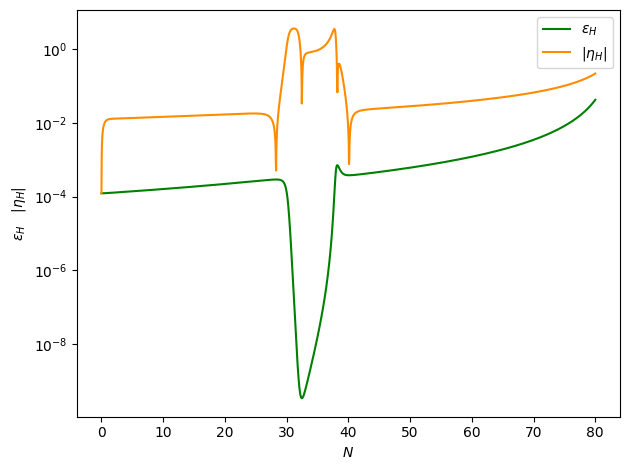

In [10]:
plt.plot(N, eps_H, label = r'$\epsilon_H$', color = 'green' )
plt.plot(N, abs(eta_H), label = r'$|\eta_H |$', color = 'darkorange')

plt.yscale('log')
plt.xlabel(r'$N$')
plt.ylabel(r'$\epsilon_H\quad |\eta_H|$')
plt.legend(loc = 'best')
#plt.title('Slow-roll parameters')
plt.tight_layout()
plt.show()

In [14]:
pert = Perturbations(potential, background, scale= 'PBH', N_CMB = 55.7)
sol = pert.Power_spectra_pivot()

Curvature power spectrum at pivot scale is 2.062464024945909e-09
Tensor to scalar ratio at pivot scale is 0.004015390153386227


In [15]:
PS = pert.Power_spectrum(save = True)

Computing P(k): 100%|██████████| 1000/1000 [01:18<00:00, 12.67it/s]


k_peak = 7.56\times 10^{+01} Mpc^-1
N_peak = 31.622207659142592
P_s(k_peak) = 0.023528055445028936
Figure saved as: Figures/spectrum_scalar.png


<Figure size 800x500 with 0 Axes>

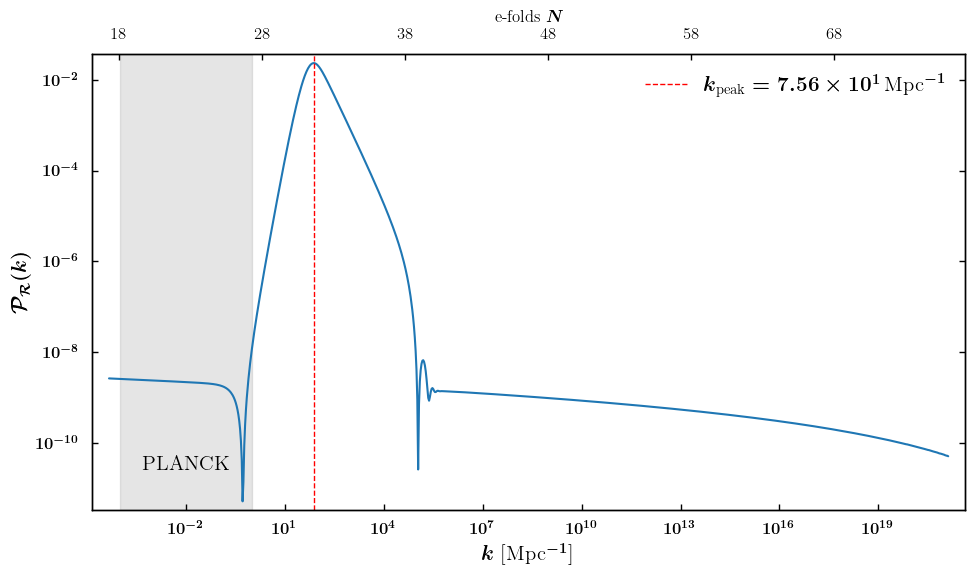

In [16]:
pert.Plot_spectrum(dpi = 100, spectrum = 'scalar', save = True)

In [17]:
pbh = PBHAbundance(pert, delta_c=0.4, gamma=0.2, gstar=107.5)
mPBH, fPBH = pbh.fPBH(save=True)

fPBH_peak = 4.928969675166729e-16
MPBH_peak = 702285055.043275 M⊙


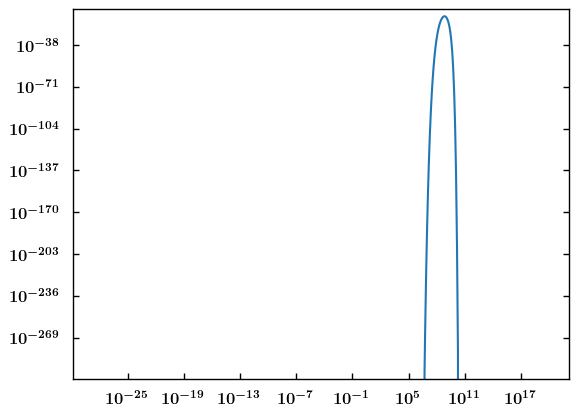

In [18]:
plt.loglog(mPBH, fPBH)